
# Project: Investigate FBI Gun Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data comes from FBI's National Instant Criminal Background Check System. This is used for recording infomation for gun owners.
>
> In this data, it records different infomation about the people who register to have a gun in different status.
> Including: population estimates, gender, races, years, housing units, financial status, education, language of speaking, employment status.
>
> Original source: https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md
>
>
>
> **Question:** How does different attributes affect gun holding rate? Which one is most associated with high gun per capita? Does gun holding rate increase thought 2010 to 2016?
>
> Especially we are going to expolre two main questions:
> 1. In general, which attribute has the greatest impact effects gun holding rate?
> 2. In one especfic category, how does years effect gun holding rate? How does between 2010 and 2016 has difference in this category?

> Understanding this, will help us have a better understanding about infomation for gun owners.


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

 - Have a general idea of the data.
 - Switch rows and columns.
 - Drop columns 65-85 which have no usefual infomation for further analysis.

### General Properties

In [63]:
# Load data and print out the first 3 rows. 
df = pd.read_csv('U.S. Census Data.csv')

df.head(3)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%


We notice that, in our data, column "Fact" is the attributes we would like to analysis about. The column name is the category we want to analysis the attributes.

In [64]:
# Switch the columns and rows.

df_t = df.transpose(copy=True)
df_t = df_t.iloc[2:]
df_t = df_t.rename(index=str,columns = df["Fact"]) 

# Check first 3 lines.
df_t.head(3)

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,nan,Value Flags,-,D,F,FN,nan,S,X,Z
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After transpose, the infomation after column 64 are not useful for analysis.

In [65]:
# Drop column 64-85.

df_t.drop(df_t.iloc[:, 64:85], inplace = True, axis = 1) 
df_t.head(3)

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33"
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"55,521","68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95"
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"451,951","499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08"


In [66]:
# Check data shape
df_t.shape

(50, 64)


### Data Cleaning (change string to float and make sub dataframes)

1. All data are in the from of string. We convert the data we would like to analysis into float for easier comparison.
2. We make several sub dataframe for further analysis.


##### Change string to float:

>Special cases:
>
> - '-' : Either no or too few sample observations were available to compute an estimate, or a ratio of medians >cannot be calculated because one or both of the median estimates falls in the lowest or upper interval of an open >ended distribution.
> - 'D' : Suppressed to avoid disclosure of confidential information
> - 'F' : Fewer than 25 firms
> - 'FN' : Footnote on this item in place of data
> - 'NA' : Not available
> - 'S' : Suppressed; does not meet publication standards
> - 'X' : Not applicable
> - 'Z' : Value greater than zero but less than half unit of measure shown

Based on the description above, we approximate '-', 'Z', 'X', 'F' as zero, and 'D', 'FN', 'NA', 'S' as mean. Meanwhile, convert percent into float if needed.

##### Sub dataframe:
For comparing the relationship bewteen gun registration with different attributes, we consider those attributes.
1. Year: (df_year : 4-9)
2. Race: (df_race: 12-20)
3. Education( df_edu: 34-36)


In [67]:
"""
For onverting string contains with '%' to float.
from data we know Z means value greater than zero but less than half unit of measure shown,
"""
def strToFloat(x):
    if not isinstance(x, str):
        return x
    else :
        if x == '-' or x == 'Z' or x == 'X' or x == 'F':
            x = 0.00
        elif x == 'D' or x == 'FN' or x == 'NA' or x == 'S':
            x = None # we convert to None for further replacement
        elif x.find('%') != -1: # x in form of '2.00%'       
            x = float(x[:-1]) / 100.0
        elif x.find(',') != -1: # x in form of '2,000,000'
            x = x.replace(',', '')
            if x.find('$') != -1:
                x = x.replace('$', '') # x in form of '$2,000,000'
            x = float(x)
        elif x.find('$') != -1: # x in form of '$2000'
            x = float(x.replace('$', ''))
        else:
            x = float(x)
    return x

In [68]:
# Use helper function to convert all data into float we want.
for col in df_t.columns:
    for ind in df_t.index: 
        df_t[col][ind] = strToFloat(df_t[col][ind])

# fill all the nones.
df_t.fillna(df_t.mean(), inplace=True)  
df_t.head(3)

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
Alabama,4863300.0,4780131.0,0.017,4779736.0,0.060,0.064,0.226,0.237,0.161,0.138,...,322025.0,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,94.4,50645.33
Alaska,741894.0,710249.0,0.045,710231.0,0.073,0.076,0.252,0.264,0.104,0.077,...,55521.0,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,1.2,570640.95
Arizona,6931071.0,6392301.0,0.084,6392017.0,0.063,0.071,0.235,0.255,0.169,0.138,...,451951.0,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,56.3,113594.08


In [69]:
# we create separate sub dataframe for later analysis. 

# df_year is the sub dataframe only contains year related infomation.
df_year = df_t.iloc[:,4:10] 

# rename for cleaner column names.
df_year.rename(columns = {df_year.columns[0]:'under 5 years(2016)',
                               df_year.columns[1]:'under 5 years(2010)',
                               df_year.columns[2]:'under 18 years(2016)',
                               df_year.columns[3]:'under 18 years(2010)',
                               df_year.columns[4]:'65 years and over(2016)',
                               df_year.columns[5]:'65 years and over(2010)'}, inplace = True)

df_year.head(3)

,under 5 years(2016),under 5 years(2010),under 18 years(2016),under 18 years(2010),65 years and over(2016),65 years and over(2010)
Alabama,0.060,0.064,0.226,0.237,0.161,0.138
Alaska,0.073,0.076,0.252,0.264,0.104,0.077
Arizona,0.063,0.071,0.235,0.255,0.169,0.138


In [70]:
# have a general idea of the data.
df_year.describe()

,under 5 years(2016),under 5 years(2010),under 18 years(2016),under 18 years(2010),65 years and over(2016),65 years and over(2010)
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.00000
mean,0.061600,0.065460,0.22750,0.238820,0.156160,0.13292
std,0.006612,0.007579,0.01977,0.019075,0.018321,0.01664
min,0.048000,0.051000,0.19000,0.207000,0.104000,0.07700
25%,0.058000,0.062000,0.21650,0.226750,0.149250,0.12425
50%,0.061000,0.065000,0.22750,0.237000,0.156500,0.13500
75%,0.064000,0.069750,0.23675,0.248000,0.165000,0.14275
max,0.083000,0.095000,0.30200,0.315000,0.199000,0.17300


In [71]:
# df_race is the sub dataframe only contains race related infomation about gun data.
df_race = df_t.iloc[:,12:20]

# rename for cleaner column names.
df_race.rename(columns = {df_race.columns[0]:'White alone',
                               df_race.columns[1]:'Black or African American alone',
                               df_race.columns[2]:'American Indian and Alaska Native alone',
                               df_race.columns[3]:'Asian alone',
                               df_race.columns[4]:'Native Hawaiian and Other Pacific Islander alone',
                               df_race.columns[5]:'Two or More Races',
                               df_race.columns[6]:'Hispanic or Latino',
                               df_race.columns[7]:'White alone, not Hispanic or Latino'}, inplace = True)
df_race.head(3)

,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Two or More Races,Hispanic or Latino,"White alone, not Hispanic or Latino"
Alabama,0.693,0.268,0.007,0.014,0.001,0.016,0.042,0.658
Alaska,0.661,0.038,0.152,0.063,0.013,0.073,0.070,0.612
Arizona,0.833,0.049,0.054,0.034,0.003,0.028,0.309,0.555


In [72]:
# have a general idea of the data
df_race.describe()

,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Two or More Races,Hispanic or Latino,"White alone, not Hispanic or Latino"
count,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.00000,50.000000
mean,0.793080,0.110240,0.019980,0.04342,0.003960,0.029440,0.11714,0.693200
std,0.123359,0.096319,0.030651,0.05562,0.014377,0.031868,0.10326,0.156635
min,0.258000,0.006000,0.002000,0.00800,0.000000,0.012000,0.01500,0.221000
25%,0.724750,0.036250,0.005000,0.01725,0.001000,0.019000,0.05000,0.595500
50%,0.821000,0.082000,0.007500,0.02850,0.001000,0.022000,0.09200,0.729500
75%,0.875000,0.155250,0.016000,0.04775,0.002000,0.027000,0.13550,0.803750
max,0.948000,0.377000,0.152000,0.37700,0.102000,0.237000,0.48500,0.935000


In [73]:
# df_edu is the sub dataframe only contains education related infomation.
df_edu = df_t.iloc[:,34:36]   

# rename for cleaner column names.
df_edu.rename(columns = {df_edu.columns[0]:'High school grad or higher',
                         df_edu.columns[1]:'Bachelor or higher'}, inplace = True)
df_edu.head(3)

,High school grad or higher,Bachelor or higher
Alabama,0.843,0.235
Alaska,0.921,0.280
Arizona,0.860,0.275


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Attribute has the greatest impact)

For question1, we are going to compare the impact on different attributes which have effect on gun holding capita. Especially:
> 1. Difference in races
> 2. Difference based on education level
> 3. Difference bewtween years

We plan to have a geranal idea on each attributes first, then compare which one has the greatest impact amoung each category.

##### Race

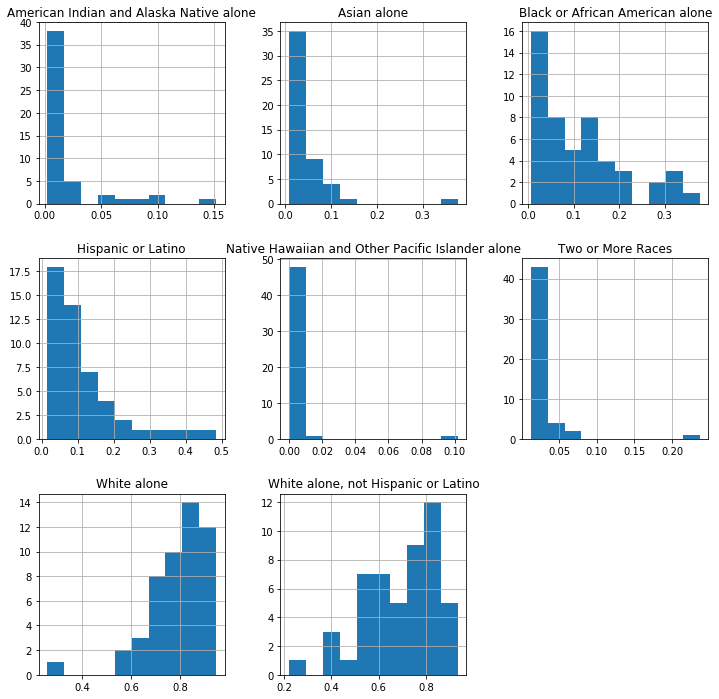

In [74]:
# have a general idea of the data
df_race.hist(figsize=(12,12));

We notice that white people have much higher gun holding rate compares to other races.

Text(0.5,0,'gun holding rate')

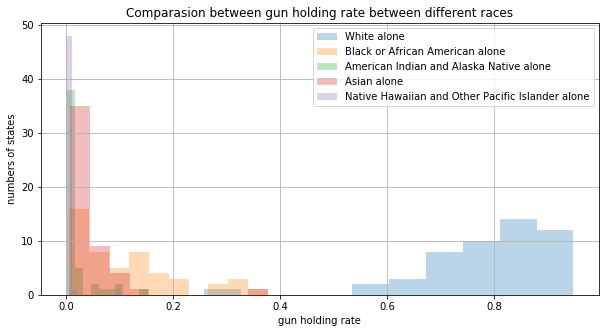

In [75]:
# use histgram to compare gun holding rate amoung races.
df_race["White alone"].hist(alpha=0.3, label='White alone', figsize=(10,5));
df_race["Black or African American alone"].hist(alpha=0.3, label='Black or African American alone', figsize=(10,5));
df_race["American Indian and Alaska Native alone"].hist(alpha=0.3, label='American Indian and Alaska Native alone', figsize=(10,5));
df_race["Asian alone"].hist(alpha=0.3, label='Asian alone', figsize=(10,5));
df_race["Native Hawaiian and Other Pacific Islander alone"].hist(alpha=0.3, label='Native Hawaiian and Other Pacific Islander alone', figsize=(10,5));
plt.legend();
plt.title("Comparasion between gun holding rate between different races")
plt.ylabel("numbers of states")
plt.xlabel("gun holding rate")

We notice we have a large difference between white people and other race people.

Text(0.5,0,'gun holding rate')

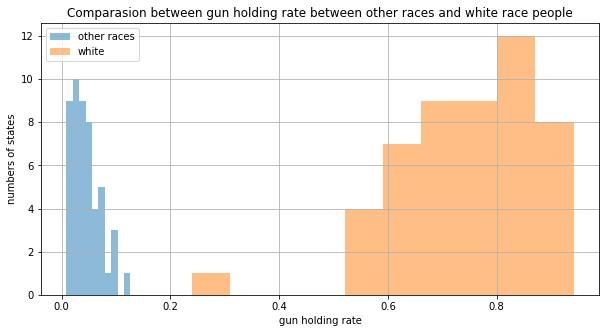

In [76]:
# using histgram to confirm our observation 
((df_race["Black or African American alone"] 
 + df_race["American Indian and Alaska Native alone"]
 + df_race["Asian alone"]
 + df_race["Native Hawaiian and Other Pacific Islander alone"])/4).hist(alpha=0.5, label='other races', figsize=(10,5));
((df_race["White alone"]
 + df_race["White alone, not Hispanic or Latino"])/2).hist(alpha=0.5, label='white', figsize=(10,5));
plt.legend();
plt.title("Comparasion between gun holding rate between other races and white race people")
plt.ylabel("numbers of states")
plt.xlabel("gun holding rate")

For race, we will compare the difference between white race and other races.
###### Education

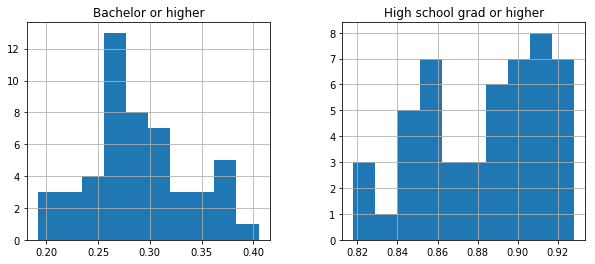

In [77]:
# have a general idea of the data.
df_edu.hist(figsize=(10,4));

There is a difference between high school grad or higher people's gun holding rate than people who have bachelor or higher education.

Text(0.5,0,'gun holding rate')

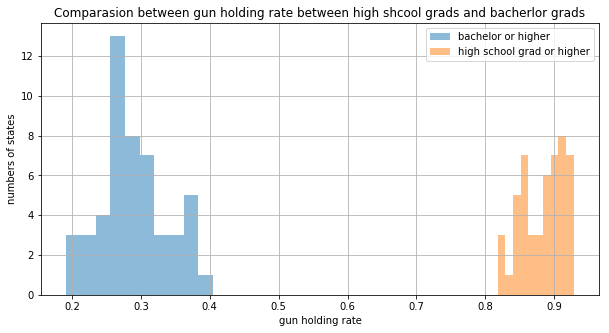

In [78]:
# confirm our observation 
(df_edu["Bachelor or higher"]).hist(alpha=0.5, label='bachelor or higher', figsize=(10,5));
(df_edu["High school grad or higher"]).hist(alpha=0.5, label='high school grad or higher', figsize=(10,5));
plt.legend();
plt.title("Comparasion between gun holding rate between high shcool grads and bacherlor grads")
plt.ylabel("numbers of states")
plt.xlabel("gun holding rate")

For education, it seems the gun holding rate in the people who have bachelor or higher have a great different to people who have high school grad or higher degree. We will compare this different to other attributes.
###### Years

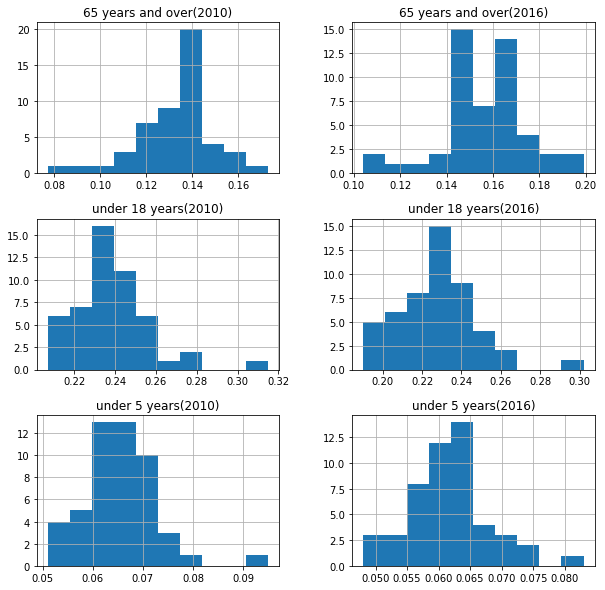

In [79]:
# have a general idea of the infomation.
df_year.hist(figsize=(10,10));

It seems people who are under 18 years have a great different than other years people.

Text(0.5,0,'gun holding rate')

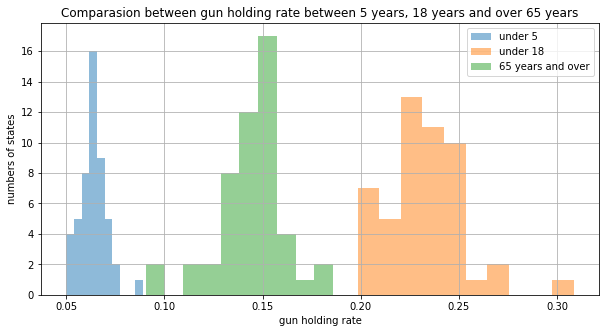

In [80]:
# we combine 2010 data and 2016 data to find which category has the greatest impact
((df_year["under 5 years(2010)"] + df_year["under 5 years(2016)"])/2).hist(alpha=0.5, label='under 5', figsize=(10,5));
((df_year["under 18 years(2010)"] + df_year["under 18 years(2016)"])/2).hist(alpha=0.5, label='under 18', figsize=(10,5));
((df_year["65 years and over(2010)"] + df_year["65 years and over(2016)"])/2).hist(alpha=0.5, label='65 years and over', figsize=(10,5));
plt.legend();
plt.title("Comparasion between gun holding rate between 5 years, 18 years and over 65 years")
plt.ylabel("numbers of states")
plt.xlabel("gun holding rate")

Text(0.5,0,'gun holding rate')

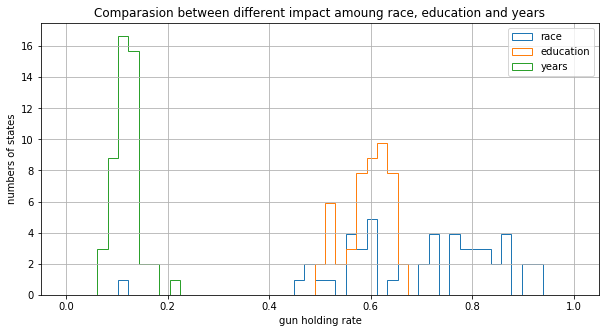

In [81]:
# We use line histgram for comparing impact level.

# For race.
((df_race["White alone"] + df_race["White alone, not Hispanic or Latino"])/2
 - (df_race["Black or African American alone"] 
 + df_race["American Indian and Alaska Native alone"]
 + df_race["Asian alone"]
 + df_race["Native Hawaiian and Other Pacific Islander alone"])/4).hist(bins=np.linspace(0, 1, 50), histtype=u'step', density=True, label='race', figsize=(10,5))  

# For education.
(df_edu["High school grad or higher"]
 - df_edu["Bachelor or higher"] ).hist(bins=np.linspace(0, 1, 50), histtype=u'step', density=True, label='education', figsize=(10,5))  

# For years.
(df_year["under 18 years(2016)"] - (df_year["under 5 years(2016)"] + df_year["65 years and over(2016)"])/2).hist(bins=np.linspace(0, 1, 50), histtype=u'step', density=True, label='years', figsize=(10,5))  

plt.legend();
plt.title("Comparasion between different impact amoung race, education and years")
plt.ylabel("numbers of states")
plt.xlabel("gun holding rate")

We notice that, amoung this three attributes, races has the greatest impact.
Years does not have a great impact compare to race and education level.


### Research Question 2 (Years)

For question 2, we are going to explore the relationship between years and gun holding rate.

1. How does different year group have different gun holding rate.
2. How does gun holding rate change between 2010 and 2016 based on the data in year categroy.

From the general histgram in question 1, we notice that,
1. only 65 years and over categary skewed to the left, under 5 years and under 18 years are skewed into right.
2. It seems under 18 years categray has the overall highest gun holding rate.
3. It seems 2016 has increase gun holding rate compare to 2010.

We are going to compare more about years separately between 2010 data and 2016 data.

For point 2, we make a histgram comparing 'under 5 years', 'under 18 years' and '65 years and over' together.

Text(0.5,0,'gun holding rate')

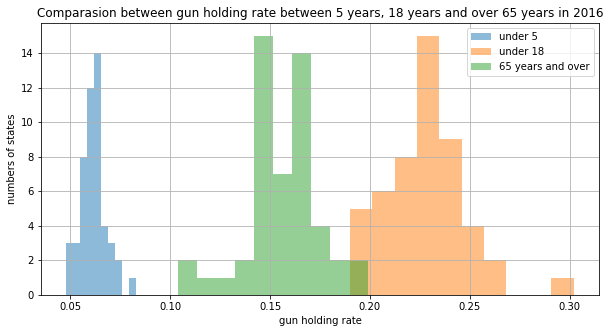

In [82]:
# histgram for 2016 data.
df_year["under 5 years(2016)"].hist(alpha=0.5, label='under 5', figsize=(10,5));
df_year["under 18 years(2016)"].hist(alpha=0.5, label='under 18', figsize=(10,5));
df_year["65 years and over(2016)"].hist(alpha=0.5, label='65 years and over', figsize=(10,5));
plt.legend();
plt.title("Comparasion between gun holding rate between 5 years, 18 years and over 65 years in 2016")
plt.ylabel("numbers of states")
plt.xlabel("gun holding rate")

Text(0.5,0,'gun holding rate')

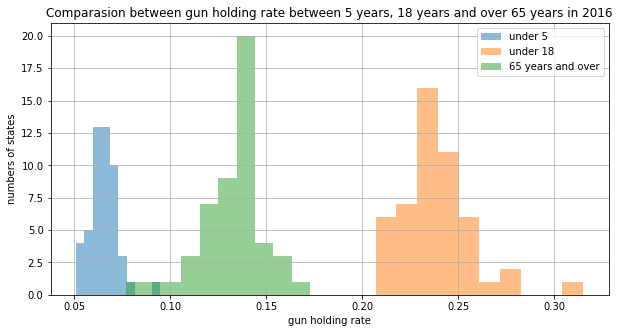

In [75]:
# histgram for 2010 data.
df_year["under 5 years(2010)"].hist(alpha=0.5, label='under 5', figsize=(10,5));
df_year["under 18 years(2010)"].hist(alpha=0.5, label='under 18', figsize=(10,5));
df_year["65 years and over(2010)"].hist(alpha=0.5, label='65 years and over', figsize=(10,5));
plt.legend();
plt.title("Comparasion between gun holding rate between 5 years, 18 years and over 65 years in 2010")
plt.ylabel("numbers of states")
plt.xlabel("gun holding rate")

For point 3, we compare mean in same year catergory for different years.

In [83]:
# mean for under 5 years in 2016 data.
mean_5_2016 = df_year["under 5 years(2016)"].mean()
mean_5_2016

0.061599999999999995

In [84]:
# mean for under 5 years in 2010 data.
mean_5_2010 = df_year["under 5 years(2010)"].mean()
mean_5_2010

0.065460000000000018

In [85]:
# mean for under 18 years in 2016 data.
mean_18_2016 = df_year["under 18 years(2016)"].mean()
mean_18_2016

0.22750000000000001

In [87]:
# mean for under 18 years in 2010 data.
mean_18_2010 = df_year["under 18 years(2010)"].mean()
mean_18_2010

0.23882

In [88]:
# mean for over 65 years in 2016 data.
mean_65_2016 = df_year["65 years and over(2016)"].mean()
mean_65_2016

0.15615999999999999

In [89]:
# mean for over 65 years in 2010 data.
mean_65_2010 = df_year["65 years and over(2010)"].mean()
mean_65_2010

0.13292000000000001

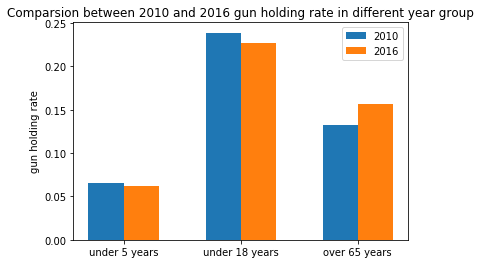

In [90]:
# Use column chart to compare the different between 2010 data and 2016 data.

N = 3
means_2010 = (mean_5_2010, mean_18_2010, mean_65_2010)
means_2016 = (mean_5_2016, mean_18_2016, mean_65_2016)

ind = np.arange(N) 
width = 0.3     
plt.bar(ind, means_2010, width, label='2010')
plt.bar(ind + width, means_2016, width,
    label='2016')

plt.ylabel('gun holding rate')
plt.title('Comparsion between 2010 and 2016 gun holding rate in different year group')

plt.xticks(ind + width / 2, ('under 5 years', 'under 18 years', 'over 65 years'))
plt.legend(loc='best')
plt.show()

We notice that, the mean difference in same category for different years is small.
Also, '65 years and over' category, there is an increase of gun holding rate however in 'under 18 years' and 'under 5 years' categories, there is a decrease of gun holding rate.
So we need to compare the difference in general.

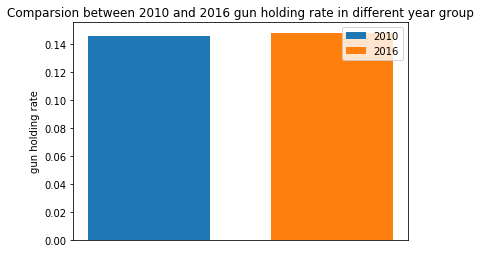

In [121]:
N = 1
means_2010 = (mean_5_2010 + mean_18_2010 + mean_65_2010)/3
means_2016 = (mean_5_2016 + mean_18_2016 + mean_65_2016)/3

ind = np.arange(N)     
plt.bar(ind, means_2010, 0.1, label='2010')
plt.bar(ind + 0.15, means_2016, 0.1, label='2016')

plt.ylabel('gun holding rate')
plt.title('Comparsion between 2010 and 2016 gun holding rate in different year group')

plt.xticks(ind + width / 2, ('mean average'))
plt.legend(loc='best')
plt.show()

There is a slightly increase of gun holding rate between 2010 and 2016.

<a id='conclusions'></a>
## Conclusions


1. Research Question 1 (Attribute has the greatest impact)
> In question 1, we are investing which attributes has the greatest impact on gun holding rate.
> We compared three different attributes: races, education and years.
>
> Amoung these three attributes, white race and other races have the greatest difference, education between highschool graduation and bachelor graducation people's gun holding rate has a big difference, difference between different years is not very obvious compare to other two.



2. Research Question 2 (Years)
> In question 2 we answered two questions:
> How does different year group have different gun holding rate.
> How does gun holding rate change between 2010 and 2016 based on the data in year categroy.
>
> We have a obvious gun holding rate difference between people under 5 years, under 18 years and people over 65 years.
>
> People have a lower gun holding rate for whoever under 5 years.
> People over 65 years have a higher gun holding rate than under 5 years.
> People under 18 years have a higher gun holding rate than both under 5 years and over 65 years.
>
> We also have a slightly increase between gun holding rate in 2010 to 2016.

### Limitation

In our research, many attributes are hard to compare for impact. 

Regardless of the lacking kinds of attributes, although we find there is obvious impact between highschool degree and bachelor degree data, the data will be more persuasive if we have for example, data for people who do not finish highschool, or data who have post graduation education.

In [122]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0